In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from selenium import webdriver

from time import sleep

In [2]:
flights = pd.read_csv('Flight_Correct3.csv')

In [3]:
flights.head()

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875"
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906"
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935"
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142"
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251"


In [4]:
rows = flights.shape[0]
columns = flights.shape[1]

print(rows)
print(columns)

3966
10


In [5]:
flights.index

RangeIndex(start=0, stop=3966, step=1)

In [6]:
flights.columns

Index(['Unnamed: 0', 'Airlines', 'Sources', 'Destinations', 'Duration',
       'Total Stops', 'Date', 'Arrival Time', 'Departure Time', 'Prices'],
      dtype='object')

In [7]:
attributes = flights.columns.tolist()[1:]

In [8]:
print(attributes)

['Airlines', 'Sources', 'Destinations', 'Duration', 'Total Stops', 'Date', 'Arrival Time', 'Departure Time', 'Prices']


In [9]:
flights['Airlines'].value_counts()

Airlines
IndiGo                                  1234
Air India                                836
Vistara                                  647
Vistara, Air India                       333
Air India, Vistara                       201
Air India Express                        135
Akasa Air                                 79
SpiceJet                                  78
Air India Express, Air India Express      49
Air India, IndiGo                         43
Vistara, IndiGo                           41
Akasa Air, IndiGo                         36
IndiGo, Air India                         26
IndiGo, Akasa Air                         25
SpiceJet, IndiGo                          24
Air India, Akasa Air                      17
Air India Express, IndiGo                 15
IndiGo, Vistara                           13
IndiGo, Air India Express                 13
Vistara, Akasa Air                        12
Multiple Airlines                         10
Akasa Air, SpiceJet                       10
E

In [10]:
flights

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875"
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906"
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935"
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142"
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251"
...,...,...,...,...,...,...,...,...,...,...
3961,3961,Multiple Airlines,JLR,AMD,10h 40m,2 stops,5/6/2024,02:25+1,15:45,"₹ 16,331"
3962,3962,"IndiGo, Air India",JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820"
3963,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975"
3964,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510"


In [11]:
flights['Airlines'].unique()

array(['Air India', 'Vistara', 'SpiceJet', 'Akasa Air', 'IndiGo',
       'Air India Express', 'Air India Express, Air India Express',
       'Vistara, Air India', 'Air India, Vistara', 'Etihad Airways',
       'SpiceJet, Akasa Air', 'Emirates', 'Akasa Air, IndiGo',
       'Malaysia Airlines', 'Air India, IndiGo', 'Vistara, IndiGo',
       'SpiceJet, IndiGo', 'Multiple Airlines', 'SpiceJet, Vistara',
       'SpiceJet, Air India Express', 'IndiGo, Air India',
       'Air India, Akasa Air', 'IndiGo, Akasa Air', 'IndiGo, Vistara',
       'Vistara, Akasa Air', 'IndiGo, Air India Express',
       'Vistara, Air India Express', 'Akasa Air, Vistara',
       'Qatar Airways', 'Air India, Air India Express', 'Alliance Air',
       'Akasa Air, SpiceJet', 'Air India Express, IndiGo',
       'Air India Express, Vistara', 'Thai Airways',
       'Akasa Air, Air India', 'Air India, SpiceJet',
       'Akasa Air, Air India Express', 'Small Planet',
       'Air India Express, Akasa Air', 'Air India Express

In [12]:
flights.tail()

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices
3961,3961,Multiple Airlines,JLR,AMD,10h 40m,2 stops,5/6/2024,02:25+1,15:45,"₹ 16,331"
3962,3962,"IndiGo, Air India",JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820"
3963,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975"
3964,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510"
3965,3965,"IndiGo, Air India Express",JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261"


In [13]:
flights_ = flights.copy()
flights_

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875"
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906"
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935"
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142"
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251"
...,...,...,...,...,...,...,...,...,...,...
3961,3961,Multiple Airlines,JLR,AMD,10h 40m,2 stops,5/6/2024,02:25+1,15:45,"₹ 16,331"
3962,3962,"IndiGo, Air India",JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820"
3963,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975"
3964,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510"


In [14]:

flights_['Airlines'] = flights_['Airlines'].str.strip()


flights_['Airlines'] = flights_['Airlines'].fillna('None').str.split(',')
flights_ = flights_.explode('Airlines')
flights_

flights_['Airlines'] = flights_['Airlines'].str.strip()

In [15]:
flights_['Airlines'].unique()

array(['Air India', 'Vistara', 'SpiceJet', 'Akasa Air', 'IndiGo',
       'Air India Express', 'Etihad Airways', 'Emirates',
       'Malaysia Airlines', 'Multiple Airlines', 'Qatar Airways',
       'Alliance Air', 'Thai Airways', 'Small Planet', 'flydubai'],
      dtype=object)

In [16]:
flights_ = flights_[flights_['Airlines']!='Multiple Airlines']
flights_

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875"
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906"
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935"
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142"
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251"
...,...,...,...,...,...,...,...,...,...,...
3962,3962,Air India,JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820"
3963,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975"
3964,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510"
3965,3965,IndiGo,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261"


In [17]:
flights_['Airlines'].unique()

array(['Air India', 'Vistara', 'SpiceJet', 'Akasa Air', 'IndiGo',
       'Air India Express', 'Etihad Airways', 'Emirates',
       'Malaysia Airlines', 'Qatar Airways', 'Alliance Air',
       'Thai Airways', 'Small Planet', 'flydubai'], dtype=object)

In [18]:
flights_2 = flights_.copy()

In [19]:
flights_2

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875"
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906"
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935"
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142"
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251"
...,...,...,...,...,...,...,...,...,...,...
3962,3962,Air India,JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820"
3963,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975"
3964,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510"
3965,3965,IndiGo,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261"


In [20]:
unique_df = pd.DataFrame(flights_2['Airlines'].unique(), columns = ['Airlines'])
unique_df.to_csv("Airlines.csv")

In [21]:
def airline_search(airline):
    if airline == 'IndiGo'.strip():
        airline = 'indigo-airlines'
    else:
        airline = airline.strip().lower().replace(' ', '-')
    return airline

In [22]:
unique_df['Airlines'].apply(airline_search)


0             air-india
1               vistara
2              spicejet
3             akasa-air
4       indigo-airlines
5     air-india-express
6        etihad-airways
7              emirates
8     malaysia-airlines
9         qatar-airways
10         alliance-air
11         thai-airways
12         small-planet
13             flydubai
Name: Airlines, dtype: object

In [23]:
airline_df = pd.DataFrame(unique_df['Airlines'].apply(airline_search))
airline_df

,Airlines
0,air-india
1,vistara
2,spicejet
3,akasa-air
4,indigo-airlines
5,air-india-express
6,etihad-airways
7,emirates
8,malaysia-airlines
9,qatar-airways


In [24]:
driver = webdriver.Chrome()

for index, rows in unique_df.iterrows():
    #airline = rows['Airline']
    airline = rows['Airlines'].lower().replace(' ', '-')
    if (airline.startswith('indigo')):
        airline = 'indigo-airlines'
    print(airline)
    url = f"https://www.airlinequality.com/airline-reviews/{airline}"
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    element = soup.find('div', class_ = 'rating-10 rating-large')
    if element:
        rate = element.find('span', itemprop = 'ratingValue').text.strip()
        print(rate, airline)
        unique_df.at[index, 'Rating'] = int(rate)
 

airline_df


air-india
4 air-india
vistara
7 vistara
spicejet
4 spicejet
akasa-air
4 akasa-air
indigo-airlines
6 indigo-airlines
air-india-express
3 air-india-express
etihad-airways
4 etihad-airways
emirates
5 emirates
malaysia-airlines
5 malaysia-airlines
qatar-airways
7 qatar-airways
alliance-air
2 alliance-air
thai-airways
6 thai-airways
small-planet
flydubai
3 flydubai


,Airlines
0,air-india
1,vistara
2,spicejet
3,akasa-air
4,indigo-airlines
5,air-india-express
6,etihad-airways
7,emirates
8,malaysia-airlines
9,qatar-airways


In [25]:
unique_df

,Airlines,Rating
0,Air India,4.0
1,Vistara,7.0
2,SpiceJet,4.0
3,Akasa Air,4.0
4,IndiGo,6.0
5,Air India Express,3.0
6,Etihad Airways,4.0
7,Emirates,5.0
8,Malaysia Airlines,5.0
9,Qatar Airways,7.0


In [26]:
unique_df.to_csv("Ratings.csv")

In [27]:
unique_df.replace('n', pd.NA, inplace = True)
unique_df

,Airlines,Rating
0,Air India,4.0
1,Vistara,7.0
2,SpiceJet,4.0
3,Akasa Air,4.0
4,IndiGo,6.0
5,Air India Express,3.0
6,Etihad Airways,4.0
7,Emirates,5.0
8,Malaysia Airlines,5.0
9,Qatar Airways,7.0


In [28]:
merged_df = pd.merge(flights_2, unique_df, on = 'Airlines', how = 'left')
merged_df

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,Rating
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875",4.0
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906",7.0
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935",7.0
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142",4.0
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251",4.0
...,...,...,...,...,...,...,...,...,...,...,...
4860,3962,Air India,JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820",4.0
4861,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975",6.0
4862,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510",6.0
4863,3965,IndiGo,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261",6.0


In [29]:
airports = flights_2['Sources'].unique()
airports = pd.DataFrame(airports, columns = ['Airports'])
airports

,Airports
0,BOM
1,DEL
2,BLR
3,AMD
4,HYD
5,JLR


In [30]:
driver = webdriver.Chrome()

for index, rows in airports.iterrows():

    airport = rows['Airports']
    url = f'https://www.iata.org/en/publications/directories/code-search/?airport.search={airport}'
    
    driver.get(url)
    
    soup2 = BeautifulSoup(driver.page_source, 'html.parser')
    
    element = soup2.find('table', class_ = 'datatable')
    
    element2 = element.find('td', {'data-heading' : 'City Name'}).text

    airports.at[index, 'Airport_Name'] = element2
    
    print(element2)

Mumbai
Delhi
Bengaluru
Ahmedabad
Hyderabad
Jabalpur


In [31]:
airports

,Airports,Airport_Name
0,BOM,Mumbai
1,DEL,Delhi
2,BLR,Bengaluru
3,AMD,Ahmedabad
4,HYD,Hyderabad
5,JLR,Jabalpur


In [32]:
airports_df = pd.DataFrame(airports['Airport_Name'].unique(), columns = ['Airports'])
airports.to_csv("Airports.csv")

In [33]:
IATA_to_city = dict(zip(airports['Airports'], airports['Airport_Name']))
IATA_to_city

{'BOM': 'Mumbai',
 'DEL': 'Delhi',
 'BLR': 'Bengaluru',
 'AMD': 'Ahmedabad',
 'HYD': 'Hyderabad',
 'JLR': 'Jabalpur'}

In [34]:
flights_2['Sources'].map(IATA_to_city)

0         Mumbai
1         Mumbai
2         Mumbai
3         Mumbai
4         Mumbai
          ...   
3962    Jabalpur
3963    Jabalpur
3964    Jabalpur
3965    Jabalpur
3965    Jabalpur
Name: Sources, Length: 4865, dtype: object

In [35]:
flights_2['Sources2'] = flights_2['Sources'].map(IATA_to_city)

In [36]:
flights_2 = pd.merge(flights_2, unique_df, on = 'Airlines', how = 'left')
flights_2

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,Sources2,Rating
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875",Mumbai,4.0
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906",Mumbai,7.0
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935",Mumbai,7.0
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142",Mumbai,4.0
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251",Mumbai,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4860,3962,Air India,JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820",Jabalpur,4.0
4861,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975",Jabalpur,6.0
4862,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510",Jabalpur,6.0
4863,3965,IndiGo,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261",Jabalpur,6.0


In [37]:
flights_2['Destinations'].map(IATA_to_city)

0           Delhi
1           Delhi
2           Delhi
3           Delhi
4           Delhi
          ...    
4860    Ahmedabad
4861    Ahmedabad
4862    Ahmedabad
4863    Ahmedabad
4864    Ahmedabad
Name: Destinations, Length: 4865, dtype: object

In [38]:
flights_2['Destinations2'] = flights_2['Destinations'].map(IATA_to_city)

In [39]:
flights_2

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,Sources2,Rating,Destinations2
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875",Mumbai,4.0,Delhi
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906",Mumbai,7.0,Delhi
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935",Mumbai,7.0,Delhi
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142",Mumbai,4.0,Delhi
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251",Mumbai,4.0,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,3962,Air India,JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820",Jabalpur,4.0,Ahmedabad
4861,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975",Jabalpur,6.0,Ahmedabad
4862,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510",Jabalpur,6.0,Ahmedabad
4863,3965,IndiGo,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261",Jabalpur,6.0,Ahmedabad


In [40]:
flights_2['Date']

0       5/5/2024
1       5/5/2024
2       5/5/2024
3       5/5/2024
4       5/5/2024
          ...   
4860    5/6/2024
4861    5/6/2024
4862    5/6/2024
4863    5/6/2024
4864    5/6/2024
Name: Date, Length: 4865, dtype: object

In [41]:
flights_2['Journey Day'] = pd.to_datetime(flights_2['Date'], format = "%m/%d/%Y").dt.day
flights_2['Journey Month'] = pd.to_datetime(flights_2['Date'], format = "%m/%d/%Y").dt.month
flights_2['Journey Year'] = pd.to_datetime(flights_2['Date'], format = "%m/%d/%Y").dt.year

In [42]:
flights_2.tail()

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,Sources2,Rating,Destinations2,Journey Day,Journey Month,Journey Year
4860,3962,Air India,JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"₹ 26,820",Jabalpur,4.0,Ahmedabad,6,5,2024
4861,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"₹ 26,975",Jabalpur,6.0,Ahmedabad,6,5,2024
4862,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"₹ 27,510",Jabalpur,6.0,Ahmedabad,6,5,2024
4863,3965,IndiGo,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261",Jabalpur,6.0,Ahmedabad,6,5,2024
4864,3965,Air India Express,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"₹ 30,261",Jabalpur,3.0,Ahmedabad,6,5,2024


In [43]:
duration = flights_2['Duration'].to_list()

for i in range(len(duration)):
    if (len(duration[i].split())!=2):
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + '0m'
        else:
            duration[i] = '0h' + duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [44]:
flights_2['Duration Hours'] = duration_hours
flights_2['Duration Minutes'] = duration_mins

In [45]:
duration_hours

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 5,
 4,
 5,
 2,
 6,
 5,
 6,
 4,
 4,
 6,
 4,
 6,
 6,
 4,
 5,
 5,
 3,
 4,
 4,
 5,
 4,
 4,
 5,
 2,
 8,
 6,
 6,
 8,
 6,
 8,
 9,
 7,
 6,
 6,
 8,
 9,
 7,
 6,
 6,
 6,
 7,
 6,
 6,
 5,
 7,
 8,
 5,
 4,
 8,
 7,
 8,
 5,
 7,
 7,
 7,
 6,
 2,
 6,
 5,
 6,
 6,
 7,
 8,
 8,
 7,
 3,
 3,
 4,
 6,
 7,
 6,
 8,
 6,
 8,
 8,
 7,
 7,
 8,
 6,
 7,
 6,
 8,
 6,
 8,
 8,
 5,
 4,
 4,
 6,
 6,
 4,
 4,
 8,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 7,
 7,
 8,
 8,
 8,
 6,
 6,
 6,
 6,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 9,
 9,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 6,
 6,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 6,
 6,
 8,
 7,
 7,


In [46]:
duration_mins

[15,
 10,
 10,
 15,
 15,
 10,
 5,
 15,
 10,
 15,
 15,
 5,
 10,
 5,
 5,
 5,
 10,
 15,
 20,
 20,
 5,
 5,
 10,
 10,
 10,
 15,
 20,
 30,
 10,
 10,
 10,
 20,
 10,
 15,
 10,
 10,
 15,
 20,
 15,
 0,
 10,
 10,
 15,
 10,
 10,
 20,
 15,
 15,
 15,
 55,
 15,
 55,
 0,
 10,
 35,
 45,
 40,
 35,
 10,
 30,
 45,
 50,
 15,
 55,
 40,
 40,
 40,
 40,
 5,
 20,
 25,
 5,
 10,
 20,
 50,
 25,
 25,
 0,
 5,
 20,
 10,
 40,
 0,
 45,
 40,
 5,
 5,
 20,
 45,
 15,
 15,
 55,
 55,
 40,
 55,
 15,
 0,
 50,
 5,
 50,
 55,
 5,
 20,
 50,
 55,
 10,
 20,
 35,
 50,
 5,
 50,
 35,
 55,
 50,
 40,
 40,
 40,
 15,
 0,
 55,
 25,
 0,
 50,
 25,
 0,
 15,
 15,
 5,
 20,
 10,
 55,
 0,
 0,
 25,
 5,
 30,
 0,
 0,
 40,
 40,
 55,
 55,
 40,
 30,
 30,
 30,
 15,
 15,
 35,
 35,
 55,
 55,
 45,
 45,
 25,
 25,
 0,
 0,
 20,
 20,
 10,
 20,
 20,
 25,
 25,
 5,
 5,
 40,
 40,
 30,
 30,
 40,
 40,
 35,
 35,
 10,
 10,
 25,
 25,
 5,
 5,
 50,
 50,
 45,
 45,
 0,
 0,
 55,
 55,
 40,
 40,
 25,
 25,
 20,
 10,
 5,
 15,
 20,
 20,
 15,
 10,
 5,
 10,
 10,
 10,
 15,
 10,
 20,

In [47]:
flights_2['Departure Hour'] = pd.to_datetime(flights_2['Departure Time']).dt.hour
flights_2['Departure Minute'] = pd.to_datetime(flights_2['Departure Time']).dt.minute



C:\Users\91992\AppData\Local\Temp\ipykernel_16952\1412456371.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights_2['Departure Hour'] = pd.to_datetime(flights_2['Departure Time']).dt.hour
C:\Users\91992\AppData\Local\Temp\ipykernel_16952\1412456371.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights_2['Departure Minute'] = pd.to_datetime(flights_2['Departure Time']).dt.minute


In [48]:
flights_2.head()

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,Sources2,Rating,Destinations2,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875",Mumbai,4.0,Delhi,5,5,2024,2,15,7,0
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00+1,22:50,"₹ 4,906",Mumbai,7.0,Delhi,5,5,2024,2,10,22,50
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935",Mumbai,7.0,Delhi,5,5,2024,2,10,5,55
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55+1,22:40,"₹ 5,142",Mumbai,4.0,Delhi,5,5,2024,2,15,22,40
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55+1,23:40,"₹ 5,251",Mumbai,4.0,Delhi,5,5,2024,2,15,23,40


In [49]:
def arrival(value):
    if '+' in value:
        return value.split('+')[0]
    return value

In [50]:
flights_2['Arrival Time'] = flights_2['Arrival Time'].apply(arrival)

In [51]:
flights_2.head()

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,Sources2,Rating,Destinations2,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875",Mumbai,4.0,Delhi,5,5,2024,2,15,7,0
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00,22:50,"₹ 4,906",Mumbai,7.0,Delhi,5,5,2024,2,10,22,50
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935",Mumbai,7.0,Delhi,5,5,2024,2,10,5,55
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55,22:40,"₹ 5,142",Mumbai,4.0,Delhi,5,5,2024,2,15,22,40
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55,23:40,"₹ 5,251",Mumbai,4.0,Delhi,5,5,2024,2,15,23,40


In [52]:
flights_2['Arrival Hour'] = pd.to_datetime(flights_2['Arrival Time']).dt.hour
flights_2['Arrival Minute'] = pd.to_datetime(flights_2['Arrival Time']).dt.minute

C:\Users\91992\AppData\Local\Temp\ipykernel_16952\3972767888.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights_2['Arrival Hour'] = pd.to_datetime(flights_2['Arrival Time']).dt.hour
C:\Users\91992\AppData\Local\Temp\ipykernel_16952\3972767888.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights_2['Arrival Minute'] = pd.to_datetime(flights_2['Arrival Time']).dt.minute


In [53]:
flights_2.head()

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,...,Destinations2,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"₹ 4,875",...,Delhi,5,5,2024,2,15,7,0,9,15
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00,22:50,"₹ 4,906",...,Delhi,5,5,2024,2,10,22,50,1,0
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"₹ 4,935",...,Delhi,5,5,2024,2,10,5,55,8,5
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55,22:40,"₹ 5,142",...,Delhi,5,5,2024,2,15,22,40,0,55
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55,23:40,"₹ 5,251",...,Delhi,5,5,2024,2,15,23,40,1,55


In [54]:
flights_2['Prices'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4865 entries, 0 to 4864
Series name: Prices
Non-Null Count  Dtype 
--------------  ----- 
4865 non-null   object
dtypes: object(1)
memory usage: 38.1+ KB


In [55]:
flights_2['Prices'].str.split()[0][-1]

'4,875'

In [56]:
def prices(value):
    return value.split()[-1]

In [57]:
flights_2['Prices'].apply(prices)

0        4,875
1        4,906
2        4,935
3        5,142
4        5,251
         ...  
4860    26,820
4861    26,975
4862    27,510
4863    30,261
4864    30,261
Name: Prices, Length: 4865, dtype: object

In [58]:
flights_2['Prices'] = flights_2['Prices'].apply(prices)

In [59]:
flights_2

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,...,Destinations2,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,"4,875",...,Delhi,5,5,2024,2,15,7,0,9,15
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00,22:50,"4,906",...,Delhi,5,5,2024,2,10,22,50,1,0
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,"4,935",...,Delhi,5,5,2024,2,10,5,55,8,5
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55,22:40,"5,142",...,Delhi,5,5,2024,2,15,22,40,0,55
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55,23:40,"5,251",...,Delhi,5,5,2024,2,15,23,40,1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,3962,Air India,JLR,AMD,8h 55m,2 stops,5/6/2024,16:50,7:55,"26,820",...,Ahmedabad,6,5,2024,8,55,7,55,16,50
4861,3963,IndiGo,JLR,AMD,8h 30m,2 stops,5/6/2024,16:25,7:55,"26,975",...,Ahmedabad,6,5,2024,8,30,7,55,16,25
4862,3964,IndiGo,JLR,AMD,8h 25m,1 stop,5/6/2024,16:20,7:55,"27,510",...,Ahmedabad,6,5,2024,8,25,7,55,16,20
4863,3965,IndiGo,JLR,AMD,7h 35m,2 stops,5/6/2024,15:30,7:55,"30,261",...,Ahmedabad,6,5,2024,7,35,7,55,15,30


In [60]:
flights_2['Prices'] = flights_2['Prices'].str.replace(',', '')

In [61]:
flights_2.head()

,Unnamed: 0,Airlines,Sources,Destinations,Duration,Total Stops,Date,Arrival Time,Departure Time,Prices,...,Destinations2,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,0,Air India,BOM,DEL,2h 15m,direct,5/5/2024,9:15,7:00,4875,...,Delhi,5,5,2024,2,15,7,0,9,15
1,1,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,01:00,22:50,4906,...,Delhi,5,5,2024,2,10,22,50,1,0
2,2,Vistara,BOM,DEL,2h 10m,direct,5/5/2024,8:05,5:55,4935,...,Delhi,5,5,2024,2,10,5,55,8,5
3,3,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,00:55,22:40,5142,...,Delhi,5,5,2024,2,15,22,40,0,55
4,4,SpiceJet,BOM,DEL,2h 15m,direct,5/5/2024,01:55,23:40,5251,...,Delhi,5,5,2024,2,15,23,40,1,55


In [62]:
flights_2['Prices'] = pd.to_numeric(flights_2['Prices'])

In [63]:
flights_2['Prices']

0        4875
1        4906
2        4935
3        5142
4        5251
        ...  
4860    26820
4861    26975
4862    27510
4863    30261
4864    30261
Name: Prices, Length: 4865, dtype: int64

In [64]:
attributes_to_drop = ['Sources', 'Destinations', 'Date', 'Arrival Time', 'Departure Time', 'Duration', 'Unnamed: 0']

In [65]:
print("Dataset is preprocessed.")

Dataset is preprocessed.


In [66]:
flights_new = flights_2.drop(attributes_to_drop, axis = 'columns')
flights_new .head()

,Airlines,Total Stops,Prices,Sources2,Rating,Destinations2,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,Air India,direct,4875,Mumbai,4.0,Delhi,5,5,2024,2,15,7,0,9,15
1,Vistara,direct,4906,Mumbai,7.0,Delhi,5,5,2024,2,10,22,50,1,0
2,Vistara,direct,4935,Mumbai,7.0,Delhi,5,5,2024,2,10,5,55,8,5
3,SpiceJet,direct,5142,Mumbai,4.0,Delhi,5,5,2024,2,15,22,40,0,55
4,SpiceJet,direct,5251,Mumbai,4.0,Delhi,5,5,2024,2,15,23,40,1,55


In [67]:
flights_new.rename(columns = {'Sources2': 'Sources', 'Destinations2': 'Destinations'}, inplace = True)

In [68]:
flights_new.head()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,Air India,direct,4875,Mumbai,4.0,Delhi,5,5,2024,2,15,7,0,9,15
1,Vistara,direct,4906,Mumbai,7.0,Delhi,5,5,2024,2,10,22,50,1,0
2,Vistara,direct,4935,Mumbai,7.0,Delhi,5,5,2024,2,10,5,55,8,5
3,SpiceJet,direct,5142,Mumbai,4.0,Delhi,5,5,2024,2,15,22,40,0,55
4,SpiceJet,direct,5251,Mumbai,4.0,Delhi,5,5,2024,2,15,23,40,1,55


In [69]:
flights_new['Total Stops'].unique()

array(['direct', '1 stop', '2 stops', '3 stops'], dtype=object)

In [70]:
flights_new['Total Stops'] = flights_new['Total Stops'].replace({'direct':0, '1 stop': 1, '2 stops': 2, '3 stops': 3})
flights_new.head()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
0,Air India,0,4875,Mumbai,4.0,Delhi,5,5,2024,2,15,7,0,9,15
1,Vistara,0,4906,Mumbai,7.0,Delhi,5,5,2024,2,10,22,50,1,0
2,Vistara,0,4935,Mumbai,7.0,Delhi,5,5,2024,2,10,5,55,8,5
3,SpiceJet,0,5142,Mumbai,4.0,Delhi,5,5,2024,2,15,22,40,0,55
4,SpiceJet,0,5251,Mumbai,4.0,Delhi,5,5,2024,2,15,23,40,1,55


In [71]:
flights_new.tail()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
4860,Air India,2,26820,Jabalpur,4.0,Ahmedabad,6,5,2024,8,55,7,55,16,50
4861,IndiGo,2,26975,Jabalpur,6.0,Ahmedabad,6,5,2024,8,30,7,55,16,25
4862,IndiGo,1,27510,Jabalpur,6.0,Ahmedabad,6,5,2024,8,25,7,55,16,20
4863,IndiGo,2,30261,Jabalpur,6.0,Ahmedabad,6,5,2024,7,35,7,55,15,30
4864,Air India Express,2,30261,Jabalpur,3.0,Ahmedabad,6,5,2024,7,35,7,55,15,30


In [72]:
flights_new['Total Stops'].dtype

dtype('int64')

In [73]:
flights_new['Prices'].dtype

dtype('int64')

In [74]:
flights_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airlines          4865 non-null   object 
 1   Total Stops       4865 non-null   int64  
 2   Prices            4865 non-null   int64  
 3   Sources           4865 non-null   object 
 4   Rating            4862 non-null   float64
 5   Destinations      4865 non-null   object 
 6   Journey Day       4865 non-null   int32  
 7   Journey Month     4865 non-null   int32  
 8   Journey Year      4865 non-null   int32  
 9   Duration Hours    4865 non-null   int64  
 10  Duration Minutes  4865 non-null   int64  
 11  Departure Hour    4865 non-null   int32  
 12  Departure Minute  4865 non-null   int32  
 13  Arrival Hour      4865 non-null   int32  
 14  Arrival Minute    4865 non-null   int32  
dtypes: float64(1), int32(7), int64(4), object(3)
memory usage: 437.2+ KB


In [75]:
attributes = ['Journey Day', 'Journey Month', 'Journey Year', 'Departure Hour', 'Departure Minute', 'Arrival Hour', 'Arrival Minute']

In [76]:
flights_new[attributes] = np.int64(flights_new[attributes])

In [77]:
flights_new.tail()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute
4860,Air India,2,26820,Jabalpur,4.0,Ahmedabad,6,5,2024,8,55,7,55,16,50
4861,IndiGo,2,26975,Jabalpur,6.0,Ahmedabad,6,5,2024,8,30,7,55,16,25
4862,IndiGo,1,27510,Jabalpur,6.0,Ahmedabad,6,5,2024,8,25,7,55,16,20
4863,IndiGo,2,30261,Jabalpur,6.0,Ahmedabad,6,5,2024,7,35,7,55,15,30
4864,Air India Express,2,30261,Jabalpur,3.0,Ahmedabad,6,5,2024,7,35,7,55,15,30


In [78]:
flights_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airlines          4865 non-null   object 
 1   Total Stops       4865 non-null   int64  
 2   Prices            4865 non-null   int64  
 3   Sources           4865 non-null   object 
 4   Rating            4862 non-null   float64
 5   Destinations      4865 non-null   object 
 6   Journey Day       4865 non-null   int64  
 7   Journey Month     4865 non-null   int64  
 8   Journey Year      4865 non-null   int64  
 9   Duration Hours    4865 non-null   int64  
 10  Duration Minutes  4865 non-null   int64  
 11  Departure Hour    4865 non-null   int64  
 12  Departure Minute  4865 non-null   int64  
 13  Arrival Hour      4865 non-null   int64  
 14  Arrival Minute    4865 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 570.2+ KB


<Figure size 1200x600 with 0 Axes>

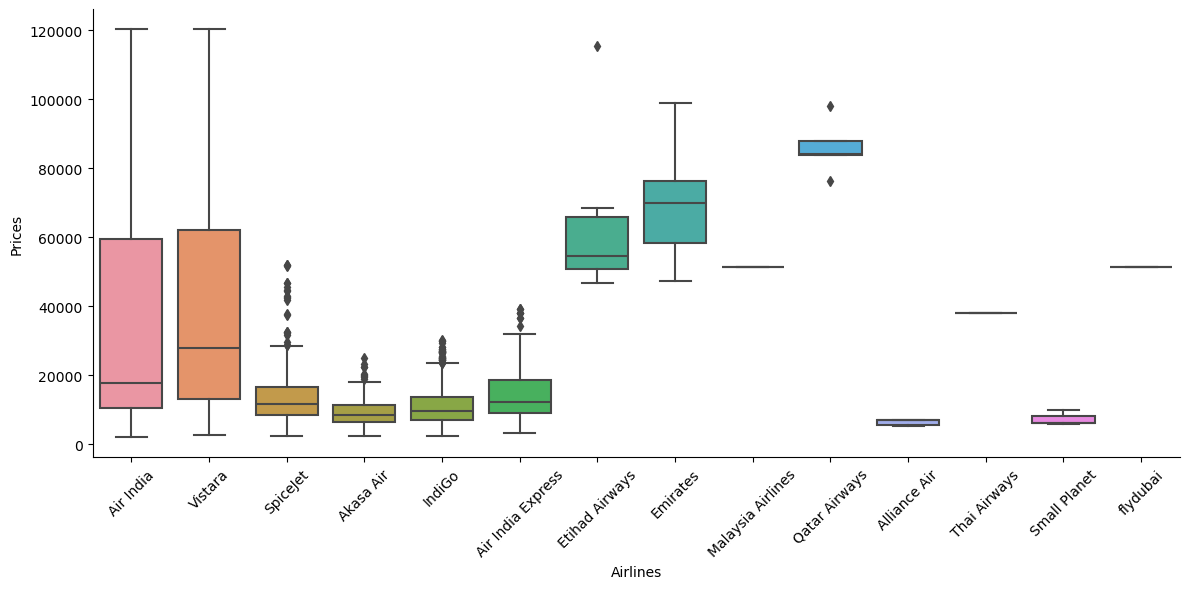

In [79]:
plt.figure(figsize=(12,6))
sns.catplot(y='Prices', x='Airlines', data=flights_2, kind='box', height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() 

<Figure size 1200x600 with 0 Axes>

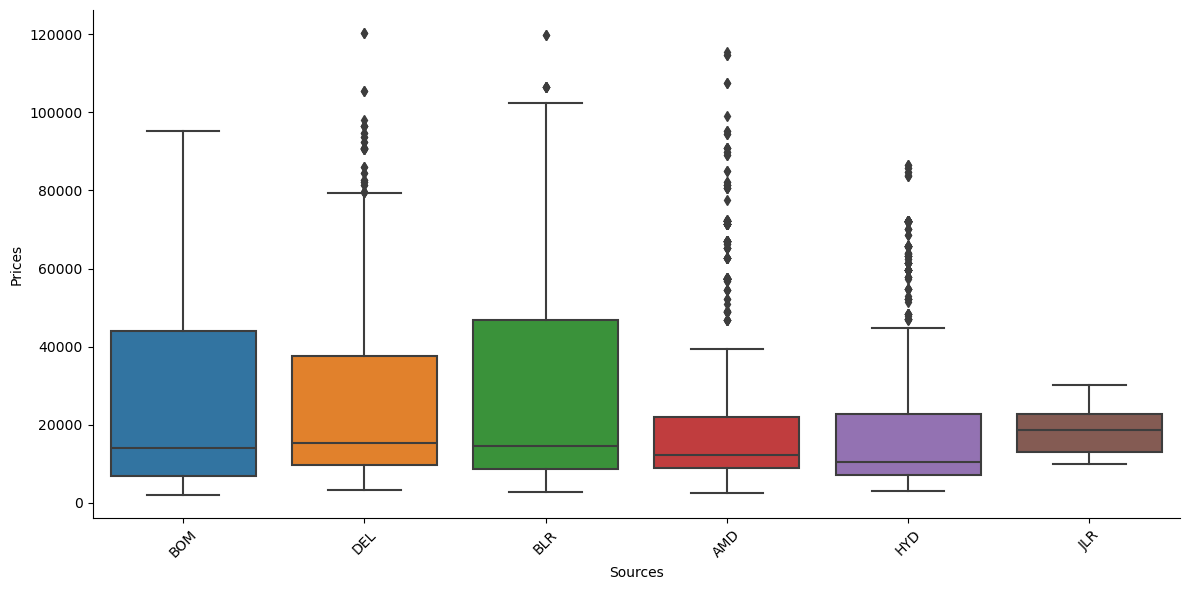

In [80]:
plt.figure(figsize=(12,6))
sns.catplot(y='Prices', x='Sources', data=flights_2, kind='box', height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() 

<Figure size 1200x600 with 0 Axes>

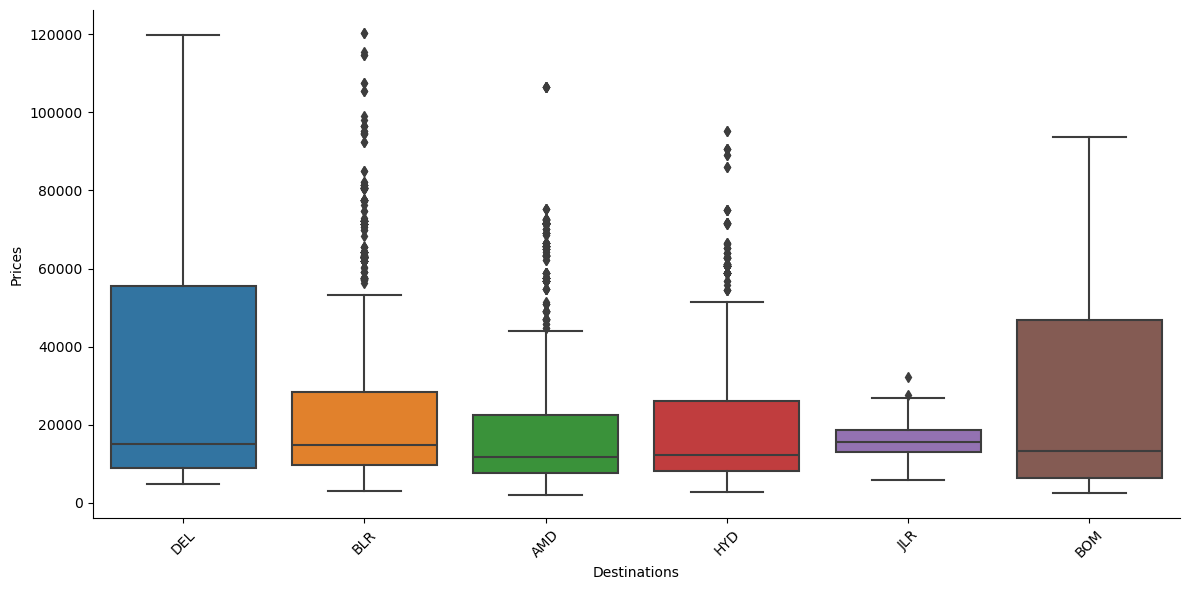

In [81]:
plt.figure(figsize=(12,6))
sns.catplot(y='Prices', x='Destinations', data=flights_2, kind='box', height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() 

<Figure size 1200x600 with 0 Axes>

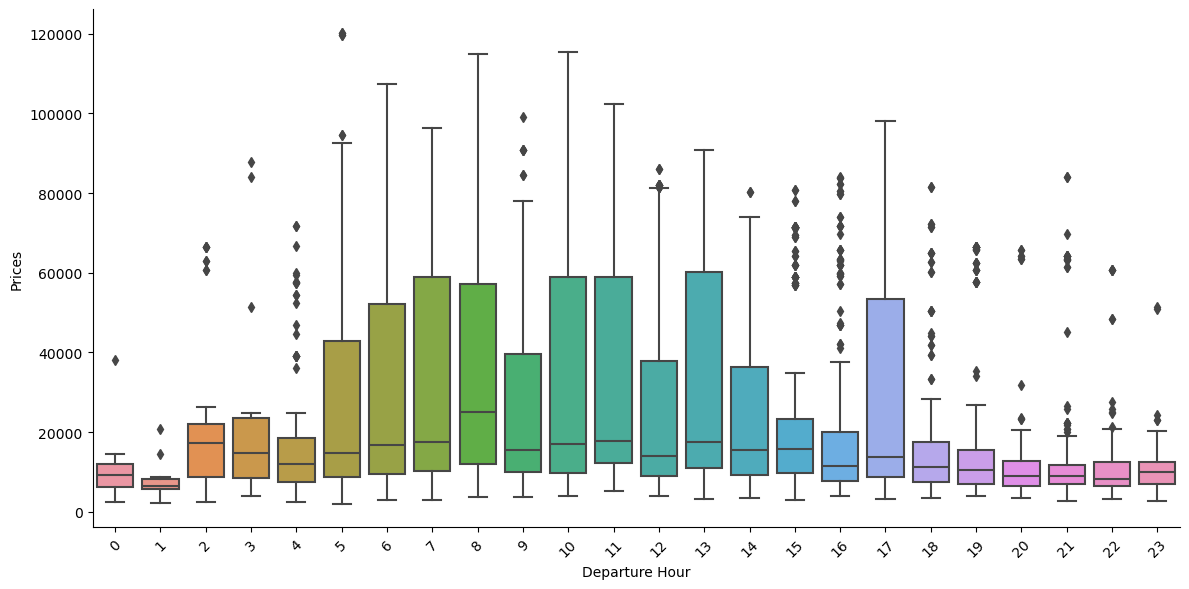

In [82]:
plt.figure(figsize=(12,6))
sns.catplot(y='Prices', x='Departure Hour', data=flights_2, kind='box', height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() 

<Figure size 1200x600 with 0 Axes>

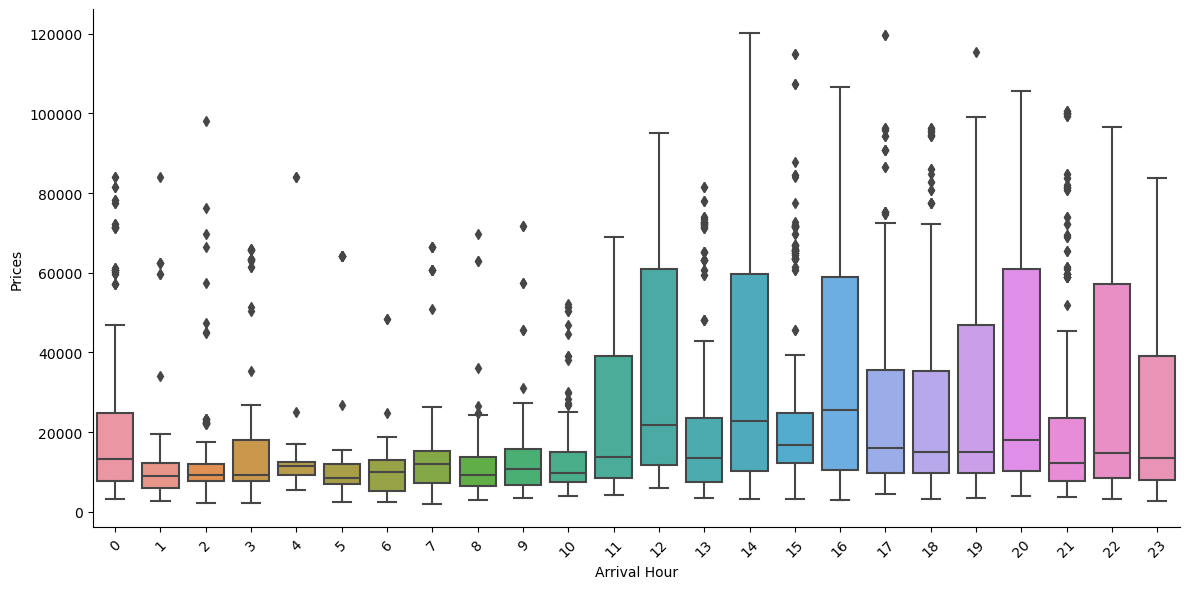

In [83]:
plt.figure(figsize=(12,6))
sns.catplot(y='Prices', x='Arrival Hour', data=flights_2, kind='box', height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() 

<Figure size 1200x600 with 0 Axes>

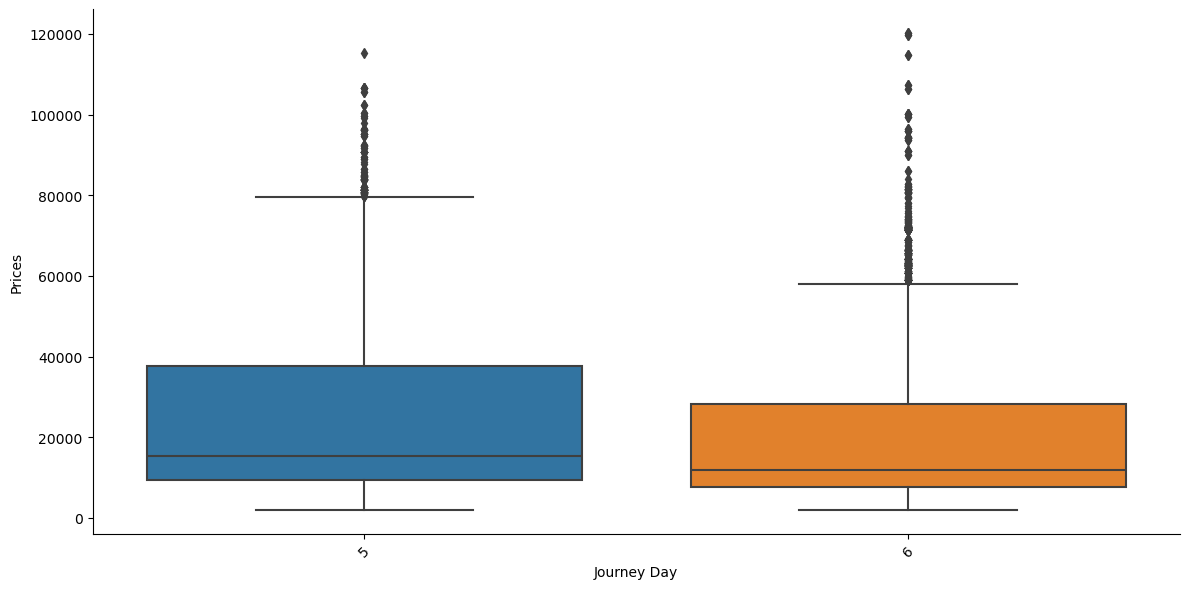

In [84]:
plt.figure(figsize=(12,6))
sns.catplot(y='Prices', x='Journey Day', data=flights_2, kind='box', height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() 

In [85]:
average_prices = flights_new.groupby('Airlines')['Prices'].mean()

flights_2_1 = pd.merge(flights_new, average_prices, on = 'Airlines', how = 'left')

average_prices.to_csv("Average Prices.csv")

In [86]:
flights_2_1

,Airlines,Total Stops,Prices_x,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Prices_y
0,Air India,0,4875,Mumbai,4.0,Delhi,5,5,2024,2,15,7,0,9,15,32819.326544
1,Vistara,0,4906,Mumbai,7.0,Delhi,5,5,2024,2,10,22,50,1,0,37714.748025
2,Vistara,0,4935,Mumbai,7.0,Delhi,5,5,2024,2,10,5,55,8,5,37714.748025
3,SpiceJet,0,5142,Mumbai,4.0,Delhi,5,5,2024,2,15,22,40,0,55,15636.185714
4,SpiceJet,0,5251,Mumbai,4.0,Delhi,5,5,2024,2,15,23,40,1,55,15636.185714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,Air India,2,26820,Jabalpur,4.0,Ahmedabad,6,5,2024,8,55,7,55,16,50,32819.326544
4861,IndiGo,2,26975,Jabalpur,6.0,Ahmedabad,6,5,2024,8,30,7,55,16,25,10776.129905
4862,IndiGo,1,27510,Jabalpur,6.0,Ahmedabad,6,5,2024,8,25,7,55,16,20,10776.129905
4863,IndiGo,2,30261,Jabalpur,6.0,Ahmedabad,6,5,2024,7,35,7,55,15,30,10776.129905


In [87]:
flights_2_1.columns

Index(['Airlines', 'Total Stops', 'Prices_x', 'Sources', 'Rating',
       'Destinations', 'Journey Day', 'Journey Month', 'Journey Year',
       'Duration Hours', 'Duration Minutes', 'Departure Hour',
       'Departure Minute', 'Arrival Hour', 'Arrival Minute', 'Prices_y'],
      dtype='object')

In [88]:
flights_new.shape

(4865, 15)

In [89]:
flights_2_1.shape

(4865, 16)

In [90]:
flights_new_2 = flights_new.copy()

In [91]:
flights_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airlines          4865 non-null   object 
 1   Total Stops       4865 non-null   int64  
 2   Prices            4865 non-null   int64  
 3   Sources           4865 non-null   object 
 4   Rating            4862 non-null   float64
 5   Destinations      4865 non-null   object 
 6   Journey Day       4865 non-null   int64  
 7   Journey Month     4865 non-null   int64  
 8   Journey Year      4865 non-null   int64  
 9   Duration Hours    4865 non-null   int64  
 10  Duration Minutes  4865 non-null   int64  
 11  Departure Hour    4865 non-null   int64  
 12  Departure Minute  4865 non-null   int64  
 13  Arrival Hour      4865 non-null   int64  
 14  Arrival Minute    4865 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 570.2+ KB


In [92]:
flights_new_2['Average Prices'] = flights_new['Airlines'].map(average_prices)
flights_new_2.head()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Average Prices
0,Air India,0,4875,Mumbai,4.0,Delhi,5,5,2024,2,15,7,0,9,15,32819.326544
1,Vistara,0,4906,Mumbai,7.0,Delhi,5,5,2024,2,10,22,50,1,0,37714.748025
2,Vistara,0,4935,Mumbai,7.0,Delhi,5,5,2024,2,10,5,55,8,5,37714.748025
3,SpiceJet,0,5142,Mumbai,4.0,Delhi,5,5,2024,2,15,22,40,0,55,15636.185714
4,SpiceJet,0,5251,Mumbai,4.0,Delhi,5,5,2024,2,15,23,40,1,55,15636.185714


In [93]:
flights_new_2.shape

(4865, 16)

In [94]:
flights_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airlines          4865 non-null   object 
 1   Total Stops       4865 non-null   int64  
 2   Prices            4865 non-null   int64  
 3   Sources           4865 non-null   object 
 4   Rating            4862 non-null   float64
 5   Destinations      4865 non-null   object 
 6   Journey Day       4865 non-null   int64  
 7   Journey Month     4865 non-null   int64  
 8   Journey Year      4865 non-null   int64  
 9   Duration Hours    4865 non-null   int64  
 10  Duration Minutes  4865 non-null   int64  
 11  Departure Hour    4865 non-null   int64  
 12  Departure Minute  4865 non-null   int64  
 13  Arrival Hour      4865 non-null   int64  
 14  Arrival Minute    4865 non-null   int64  
 15  Average Prices    4865 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory

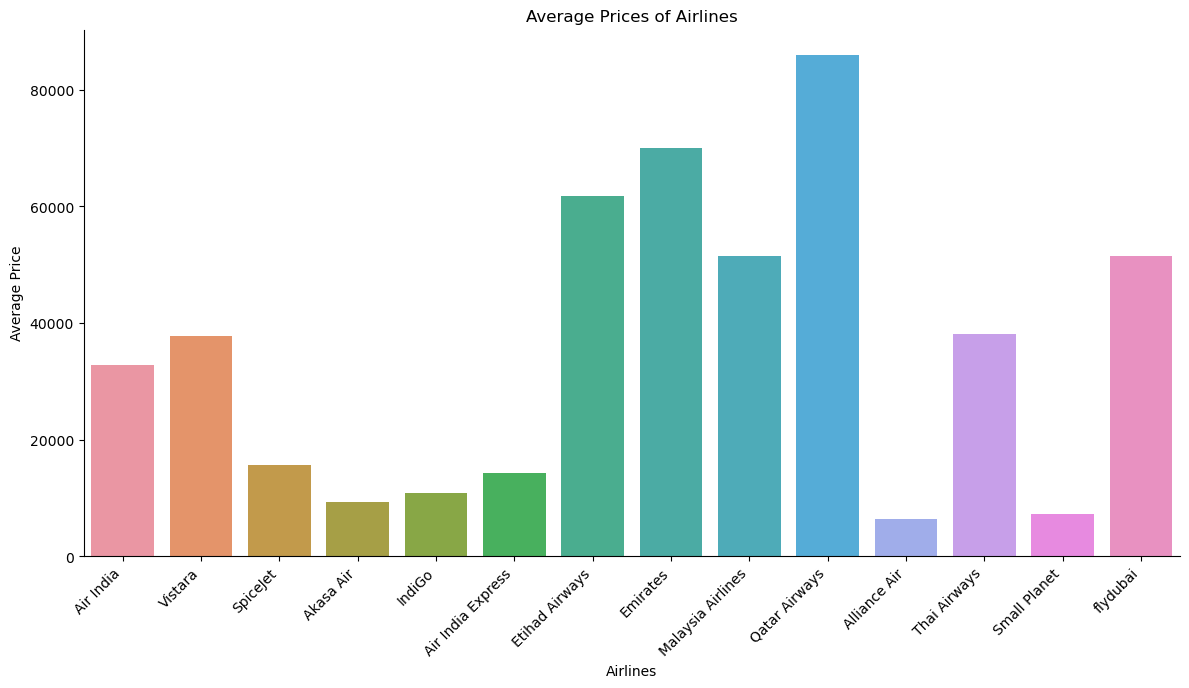

In [95]:
sns.catplot(x='Airlines', y='Average Prices', data=flights_new_2, kind='bar', height=6, aspect=2)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Average Prices of Airlines')
plt.xlabel('Airlines')
plt.ylabel('Average Price')
plt.show()

In [96]:
flights_new_2.head()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Average Prices
0,Air India,0,4875,Mumbai,4.0,Delhi,5,5,2024,2,15,7,0,9,15,32819.326544
1,Vistara,0,4906,Mumbai,7.0,Delhi,5,5,2024,2,10,22,50,1,0,37714.748025
2,Vistara,0,4935,Mumbai,7.0,Delhi,5,5,2024,2,10,5,55,8,5,37714.748025
3,SpiceJet,0,5142,Mumbai,4.0,Delhi,5,5,2024,2,15,22,40,0,55,15636.185714
4,SpiceJet,0,5251,Mumbai,4.0,Delhi,5,5,2024,2,15,23,40,1,55,15636.185714


In [97]:
flights_new_2.columns

Index(['Airlines', 'Total Stops', 'Prices', 'Sources', 'Rating',
       'Destinations', 'Journey Day', 'Journey Month', 'Journey Year',
       'Duration Hours', 'Duration Minutes', 'Departure Hour',
       'Departure Minute', 'Arrival Hour', 'Arrival Minute', 'Average Prices'],
      dtype='object')

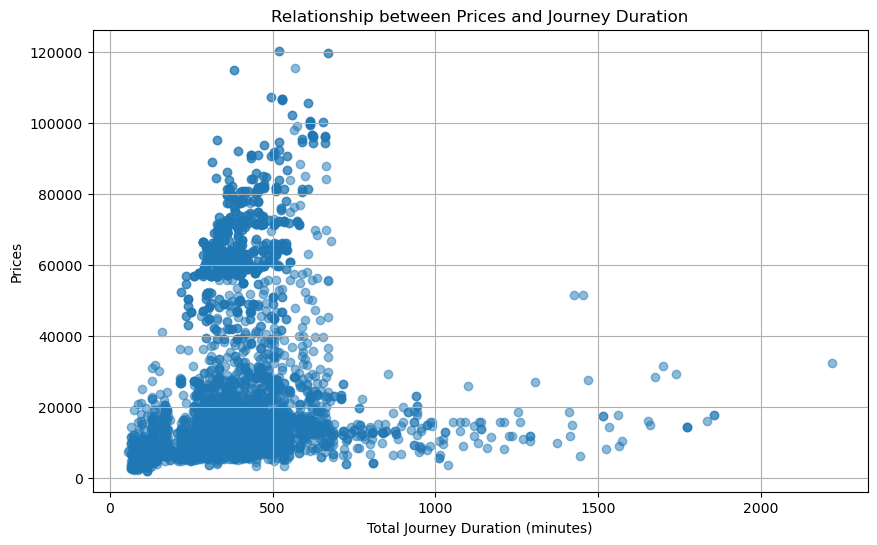

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(flights_new_2['Duration Hours'] * 60 + flights_new_2['Duration Minutes'], flights_new_2['Prices'], alpha=0.5)
plt.title('Relationship between Prices and Journey Duration')
plt.xlabel('Total Journey Duration (minutes)')
plt.ylabel('Prices')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


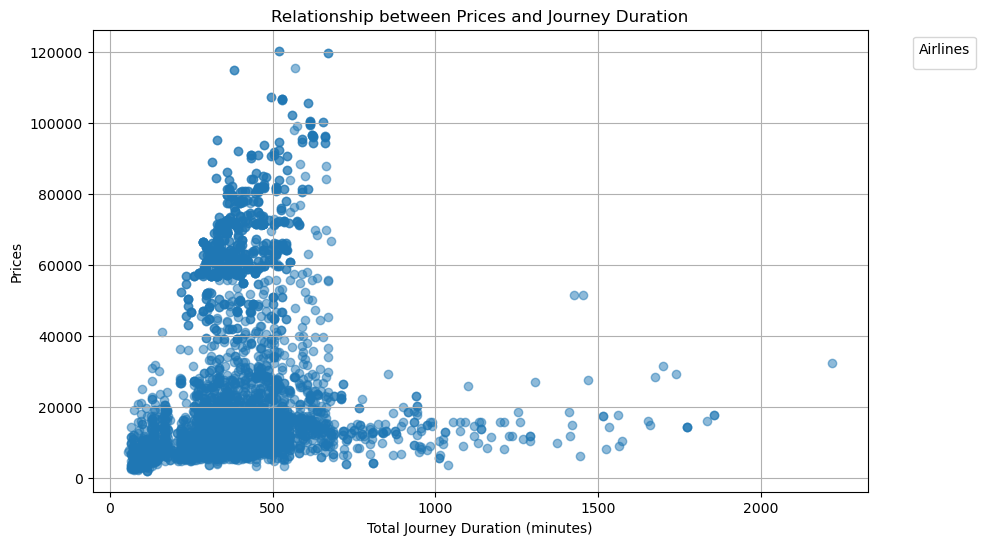

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(flights_new_2['Duration Hours'] * 60 + flights_new_2['Duration Minutes'], flights_new_2['Prices'], alpha=0.5)
plt.title('Relationship between Prices and Journey Duration')
plt.xlabel('Total Journey Duration (minutes)')
plt.ylabel('Prices')
plt.legend(title='Airlines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

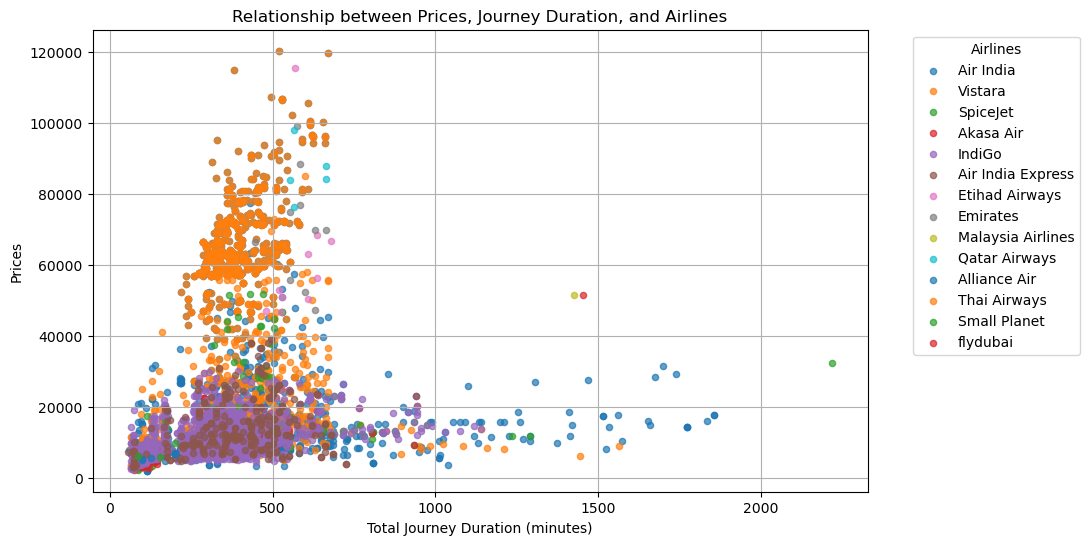

In [100]:
plt.figure(figsize=(10, 6))
for airline in flights_new_2['Airlines'].unique():
    df = flights_new_2[flights_new_2['Airlines'] == airline]
    plt.scatter(df['Duration Hours'] * 60 + df['Duration Minutes'], df['Prices'], label=airline, alpha=0.7, s = 20)

plt.title('Relationship between Prices, Journey Duration, and Airlines')
plt.xlabel('Total Journey Duration (minutes)')
plt.ylabel('Prices')
plt.legend(title='Airlines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [101]:
print("Average Price of Akasa Air: ", flights_new_2.loc[flights_new_2['Airlines'] == 'Akasa Air']['Prices'].mean())
print("Average Price of IndiGo: ", flights_new_2.loc[flights_new_2['Airlines'] == 'IndiGo']['Prices'].mean())

Average Price of Akasa Air:  9377.560209424084
Average Price of IndiGo:  10776.129905277401


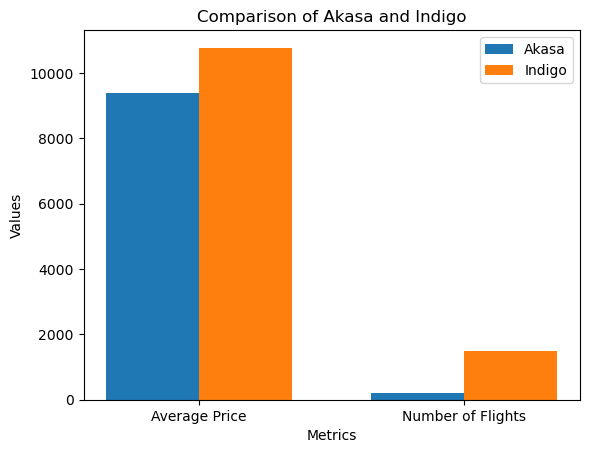

In [102]:
akasa_data = flights_new_2.loc[flights_new_2['Airlines'] == 'Akasa Air']
indigo_data = flights_new_2.loc[flights_new_2['Airlines'] == 'IndiGo']

# Calculate average price and number of flights for each airline
akasa_avg_price = akasa_data['Prices'].mean()
indigo_avg_price = indigo_data['Prices'].mean()
akasa_num_flights = len(akasa_data)
indigo_num_flights = len(indigo_data)

# Create bar graph
labels = ['Average Price', 'Number of Flights']
akasa_values = [akasa_avg_price, akasa_num_flights]
indigo_values = [indigo_avg_price, indigo_num_flights]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x, akasa_values, width, label='Akasa')
bar2 = ax.bar([p + width for p in x], indigo_values, width, label='Indigo')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Akasa and Indigo')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

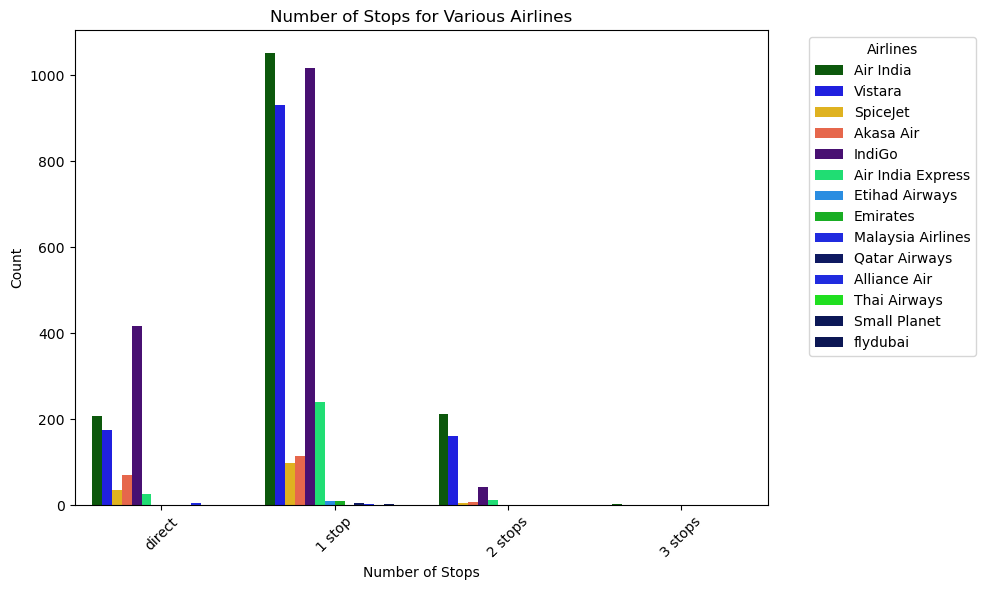

In [103]:
colors = {
    'IndiGo': '#4B0082',    # Indigo
    'Akasa Air': '#FF5733',      # Orange
    'SpiceJet': '#FFC300',   # Yellow
    'Air India': '#006400',  # Dark Green
    'Vistara': '#0000FF',    # Blue
    'Emirates': '#00C60F',
    'Etihad Airways': '#0C90FF',
    'Air India Express': '#00FC6F',
    'Malaysia Airlines': '#000FFF',
    'Qatar Airways': '#000F6F',
    'Thai Airways': '#00FF00',
    'Alliance Air': '#000FFF',
    'Small Planet': '#000F63',
    'flydubai': '#000F60'
}

plt.figure(figsize=(10, 6))
sns.countplot(x='Total Stops', hue='Airlines', data=flights_2, palette = colors)
plt.title('Number of Stops for Various Airlines')
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Airlines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

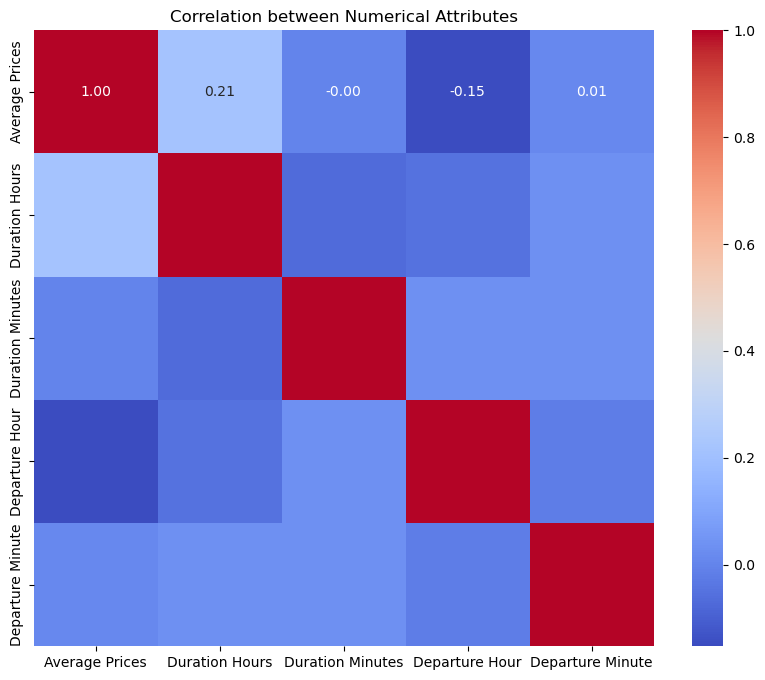

In [104]:
numerical_attributes = ['Average Prices', 'Duration Hours', 'Duration Minutes', 
                        'Departure Hour', 'Departure Minute']

# Calculate the correlation matrix
correlation_matrix = flights_new_2[numerical_attributes].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numerical Attributes')
plt.show()

In [105]:
Airlines = flights_new_2[['Airlines']]
Airlines
unique_airlines = len(Airlines.value_counts())
unique_airlines
Airlines.value_counts()

Airlines         
IndiGo               1478
Air India            1473
Vistara              1266
Air India Express     279
Akasa Air             191
SpiceJet              140
Emirates               10
Etihad Airways         10
Alliance Air            7
Qatar Airways           5
Small Planet            3
Malaysia Airlines       1
Thai Airways            1
flydubai                1
Name: count, dtype: int64

In [106]:
Airlines = pd.get_dummies(Airlines, dtype = np.int64)
Airlines

,Airlines_Air India,Airlines_Air India Express,Airlines_Akasa Air,Airlines_Alliance Air,Airlines_Emirates,Airlines_Etihad Airways,Airlines_IndiGo,Airlines_Malaysia Airlines,Airlines_Qatar Airways,Airlines_Small Planet,Airlines_SpiceJet,Airlines_Thai Airways,Airlines_Vistara,Airlines_flydubai
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4861,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4862,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4863,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
#Airlines = Airlines.drop(columns = ['Airlines_flydubai'], axis = 1)
Airlines

,Airlines_Air India,Airlines_Air India Express,Airlines_Akasa Air,Airlines_Alliance Air,Airlines_Emirates,Airlines_Etihad Airways,Airlines_IndiGo,Airlines_Malaysia Airlines,Airlines_Qatar Airways,Airlines_Small Planet,Airlines_SpiceJet,Airlines_Thai Airways,Airlines_Vistara,Airlines_flydubai
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4861,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4862,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4863,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
Source = flights_new_2[['Sources']]
Source
print(Source.value_counts())

Sources = pd.get_dummies(Source, dtype = np.int64)
Sources

Sources  
Delhi        1421
Bengaluru    1096
Ahmedabad     840
Hyderabad     717
Mumbai        712
Jabalpur       79
Name: count, dtype: int64


,Sources_Ahmedabad,Sources_Bengaluru,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
4860,0,0,0,0,1,0
4861,0,0,0,0,1,0
4862,0,0,0,0,1,0
4863,0,0,0,0,1,0


In [109]:
#Sources = Sources.drop(columns = ['Sources_Jabalpur'], axis = 1)
Sources

,Sources_Ahmedabad,Sources_Bengaluru,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
4860,0,0,0,0,1,0
4861,0,0,0,0,1,0
4862,0,0,0,0,1,0
4863,0,0,0,0,1,0


In [110]:
Destination = flights_new_2[['Destinations']]
Destination
print(Destination.value_counts())

Destinations = pd.get_dummies(Destination, dtype = np.int64)
Destinations

Destinations
Delhi           1299
Bengaluru       1175
Ahmedabad        998
Mumbai           697
Hyderabad        544
Jabalpur         152
Name: count, dtype: int64


,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
4860,1,0,0,0,0,0
4861,1,0,0,0,0,0
4862,1,0,0,0,0,0
4863,1,0,0,0,0,0


In [111]:
#Destinations = Destinations.drop(columns = ['Destinations_Jabalpur'], axis = 1)
Destinations

,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
4860,1,0,0,0,0,0
4861,1,0,0,0,0,0
4862,1,0,0,0,0,0
4863,1,0,0,0,0,0


In [112]:
pd.concat([flights_new_2, Airlines, Sources, Destinations], axis = 1).head()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,...,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,Air India,0,4875,Mumbai,4.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
1,Vistara,0,4906,Mumbai,7.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
2,Vistara,0,4935,Mumbai,7.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
3,SpiceJet,0,5142,Mumbai,4.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
4,SpiceJet,0,5251,Mumbai,4.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0


In [113]:
flights_model = pd.concat([flights_new_2, Airlines, Sources, Destinations], axis = 1)
flights_model.head()

,Airlines,Total Stops,Prices,Sources,Rating,Destinations,Journey Day,Journey Month,Journey Year,Duration Hours,...,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,Air India,0,4875,Mumbai,4.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
1,Vistara,0,4906,Mumbai,7.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
2,Vistara,0,4935,Mumbai,7.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
3,SpiceJet,0,5142,Mumbai,4.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0
4,SpiceJet,0,5251,Mumbai,4.0,Delhi,5,5,2024,2,...,0,0,0,1,0,0,1,0,0,0


In [114]:
flights_ML = flights_model.drop(['Airlines', 'Sources', 'Destinations'], axis = 1)
flights_ML.head()

,Total Stops,Prices,Rating,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,...,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,0,4875,4.0,5,5,2024,2,15,7,0,...,0,0,0,1,0,0,1,0,0,0
1,0,4906,7.0,5,5,2024,2,10,22,50,...,0,0,0,1,0,0,1,0,0,0
2,0,4935,7.0,5,5,2024,2,10,5,55,...,0,0,0,1,0,0,1,0,0,0
3,0,5142,4.0,5,5,2024,2,15,22,40,...,0,0,0,1,0,0,1,0,0,0
4,0,5251,4.0,5,5,2024,2,15,23,40,...,0,0,0,1,0,0,1,0,0,0


In [115]:
flights_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Stops                 4865 non-null   int64  
 1   Prices                      4865 non-null   int64  
 2   Rating                      4862 non-null   float64
 3   Journey Day                 4865 non-null   int64  
 4   Journey Month               4865 non-null   int64  
 5   Journey Year                4865 non-null   int64  
 6   Duration Hours              4865 non-null   int64  
 7   Duration Minutes            4865 non-null   int64  
 8   Departure Hour              4865 non-null   int64  
 9   Departure Minute            4865 non-null   int64  
 10  Arrival Hour                4865 non-null   int64  
 11  Arrival Minute              4865 non-null   int64  
 12  Average Prices              4865 non-null   float64
 13  Airlines_Air India          4865 

In [116]:
 flights_ML.isnull().sum()

Total Stops                   0
Prices                        0
Rating                        3
Journey Day                   0
Journey Month                 0
Journey Year                  0
Duration Hours                0
Duration Minutes              0
Departure Hour                0
Departure Minute              0
Arrival Hour                  0
Arrival Minute                0
Average Prices                0
Airlines_Air India            0
Airlines_Air India Express    0
Airlines_Akasa Air            0
Airlines_Alliance Air         0
Airlines_Emirates             0
Airlines_Etihad Airways       0
Airlines_IndiGo               0
Airlines_Malaysia Airlines    0
Airlines_Qatar Airways        0
Airlines_Small Planet         0
Airlines_SpiceJet             0
Airlines_Thai Airways         0
Airlines_Vistara              0
Airlines_flydubai             0
Sources_Ahmedabad             0
Sources_Bengaluru             0
Sources_Delhi                 0
Sources_Hyderabad             0
Sources_

In [117]:
flights_ML['Rating'].fillna(3, inplace = True)
flights_ML.isnull().sum()

Total Stops                   0
Prices                        0
Rating                        0
Journey Day                   0
Journey Month                 0
Journey Year                  0
Duration Hours                0
Duration Minutes              0
Departure Hour                0
Departure Minute              0
Arrival Hour                  0
Arrival Minute                0
Average Prices                0
Airlines_Air India            0
Airlines_Air India Express    0
Airlines_Akasa Air            0
Airlines_Alliance Air         0
Airlines_Emirates             0
Airlines_Etihad Airways       0
Airlines_IndiGo               0
Airlines_Malaysia Airlines    0
Airlines_Qatar Airways        0
Airlines_Small Planet         0
Airlines_SpiceJet             0
Airlines_Thai Airways         0
Airlines_Vistara              0
Airlines_flydubai             0
Sources_Ahmedabad             0
Sources_Bengaluru             0
Sources_Delhi                 0
Sources_Hyderabad             0
Sources_

In [118]:
flights_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Stops                 4865 non-null   int64  
 1   Prices                      4865 non-null   int64  
 2   Rating                      4865 non-null   float64
 3   Journey Day                 4865 non-null   int64  
 4   Journey Month               4865 non-null   int64  
 5   Journey Year                4865 non-null   int64  
 6   Duration Hours              4865 non-null   int64  
 7   Duration Minutes            4865 non-null   int64  
 8   Departure Hour              4865 non-null   int64  
 9   Departure Minute            4865 non-null   int64  
 10  Arrival Hour                4865 non-null   int64  
 11  Arrival Minute              4865 non-null   int64  
 12  Average Prices              4865 non-null   float64
 13  Airlines_Air India          4865 

In [119]:
flights_ML['Rating'] = np.int64(flights_ML['Rating'])
flights_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Stops                 4865 non-null   int64  
 1   Prices                      4865 non-null   int64  
 2   Rating                      4865 non-null   int64  
 3   Journey Day                 4865 non-null   int64  
 4   Journey Month               4865 non-null   int64  
 5   Journey Year                4865 non-null   int64  
 6   Duration Hours              4865 non-null   int64  
 7   Duration Minutes            4865 non-null   int64  
 8   Departure Hour              4865 non-null   int64  
 9   Departure Minute            4865 non-null   int64  
 10  Arrival Hour                4865 non-null   int64  
 11  Arrival Minute              4865 non-null   int64  
 12  Average Prices              4865 non-null   float64
 13  Airlines_Air India          4865 

In [120]:
flights_ML['Rating'] = flights_ML['Rating']/10

In [121]:
flights_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Stops                 4865 non-null   int64  
 1   Prices                      4865 non-null   int64  
 2   Rating                      4865 non-null   float64
 3   Journey Day                 4865 non-null   int64  
 4   Journey Month               4865 non-null   int64  
 5   Journey Year                4865 non-null   int64  
 6   Duration Hours              4865 non-null   int64  
 7   Duration Minutes            4865 non-null   int64  
 8   Departure Hour              4865 non-null   int64  
 9   Departure Minute            4865 non-null   int64  
 10  Arrival Hour                4865 non-null   int64  
 11  Arrival Minute              4865 non-null   int64  
 12  Average Prices              4865 non-null   float64
 13  Airlines_Air India          4865 

In [122]:
flights_ML.head()

,Total Stops,Prices,Rating,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,...,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,0,4875,0.4,5,5,2024,2,15,7,0,...,0,0,0,1,0,0,1,0,0,0
1,0,4906,0.7,5,5,2024,2,10,22,50,...,0,0,0,1,0,0,1,0,0,0
2,0,4935,0.7,5,5,2024,2,10,5,55,...,0,0,0,1,0,0,1,0,0,0
3,0,5142,0.4,5,5,2024,2,15,22,40,...,0,0,0,1,0,0,1,0,0,0
4,0,5251,0.4,5,5,2024,2,15,23,40,...,0,0,0,1,0,0,1,0,0,0


In [123]:
flights_ML_model_trainX = flights_ML.loc[:, flights_ML.columns]
flights_ML_model_trainX.head()

,Total Stops,Prices,Rating,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,...,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,0,4875,0.4,5,5,2024,2,15,7,0,...,0,0,0,1,0,0,1,0,0,0
1,0,4906,0.7,5,5,2024,2,10,22,50,...,0,0,0,1,0,0,1,0,0,0
2,0,4935,0.7,5,5,2024,2,10,5,55,...,0,0,0,1,0,0,1,0,0,0
3,0,5142,0.4,5,5,2024,2,15,22,40,...,0,0,0,1,0,0,1,0,0,0
4,0,5251,0.4,5,5,2024,2,15,23,40,...,0,0,0,1,0,0,1,0,0,0


In [124]:
flights_ML_model_trainY = flights_ML_model_trainX['Prices']
flights_ML_model_trainY

0        4875
1        4906
2        4935
3        5142
4        5251
        ...  
4860    26820
4861    26975
4862    27510
4863    30261
4864    30261
Name: Prices, Length: 4865, dtype: int64

In [125]:
flights_ML_model_trainX = flights_ML_model_trainX.drop(['Prices'], axis = 1)
flights_ML_model_trainX

,Total Stops,Rating,Journey Day,Journey Month,Journey Year,Duration Hours,Duration Minutes,Departure Hour,Departure Minute,Arrival Hour,...,Sources_Delhi,Sources_Hyderabad,Sources_Jabalpur,Sources_Mumbai,Destinations_Ahmedabad,Destinations_Bengaluru,Destinations_Delhi,Destinations_Hyderabad,Destinations_Jabalpur,Destinations_Mumbai
0,0,0.4,5,5,2024,2,15,7,0,9,...,0,0,0,1,0,0,1,0,0,0
1,0,0.7,5,5,2024,2,10,22,50,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0.7,5,5,2024,2,10,5,55,8,...,0,0,0,1,0,0,1,0,0,0
3,0,0.4,5,5,2024,2,15,22,40,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0.4,5,5,2024,2,15,23,40,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,2,0.4,6,5,2024,8,55,7,55,16,...,0,0,1,0,1,0,0,0,0,0
4861,2,0.6,6,5,2024,8,30,7,55,16,...,0,0,1,0,1,0,0,0,0,0
4862,1,0.6,6,5,2024,8,25,7,55,16,...,0,0,1,0,1,0,0,0,0,0
4863,2,0.6,6,5,2024,7,35,7,55,15,...,0,0,1,0,1,0,0,0,0,0


In [126]:
flights_ML_model_trainY

0        4875
1        4906
2        4935
3        5142
4        5251
        ...  
4860    26820
4861    26975
4862    27510
4863    30261
4864    30261
Name: Prices, Length: 4865, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(flights_ML_model_trainX, flights_ML_model_trainY, test_size = 0.15, random_state = 101)

In [128]:
X_train.shape

(4135, 38)

In [129]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = [1.0, 'sqrt']

max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [1.0, 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [130]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 6, random_state = 42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=6)

In [131]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 1.0,
 'max_depth': 100,
 'bootstrap': True}

In [132]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=100, n_estimators=800)

In [133]:
predictions = rf_random.best_estimator_.predict(X_test)

In [134]:
len(predictions)

730

In [135]:
from sklearn import metrics

metrics.r2_score(predictions, y_test)

0.6455003946172924

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [100],
    'max_features': [1.0],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [1250, 1400, 1450, 1500]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100],
                         'max_features': [1.0], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [1250, 1400, 1450, 1500]},
             verbose=3)

In [137]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [138]:
predictions2 = grid_search.best_estimator_.predict(X_test)

In [139]:
metrics.r2_score(predictions2, y_test)

0.6469334299823415

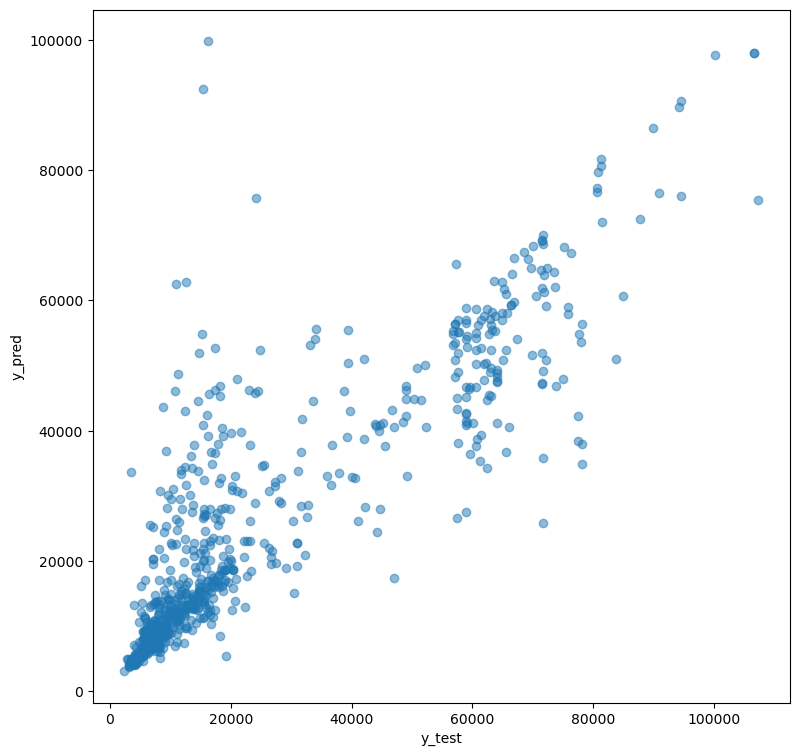

In [140]:
plt.figure(figsize = (9,  9))
plt.scatter(y_test, predictions2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [141]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree_model = ExtraTreesRegressor(n_estimators = 1000, max_depth = 100,
          criterion ='squared_error', max_features = 1.0, verbose = 6, n_jobs = -1)
# Training the model
extra_tree_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s


building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000

building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    0.3s


building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s


building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000
building tree 241 of 1000
building tree 242 of 1000
building tree 243 of 1000
building tree 244 of 1000
building tree 245 of 1000
building tree 246 of 1000
building tree 247 of 1000
building tree 248 of 1000
building tree 249 of 1000
building tree 250 of 1000
building tree 251 of 1000
building tree 252 of 1000
building tree 253 of 1000
building tree 254 of 1000
building tree 255 of 1000
building tree 256 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:    0.8s


building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.3s


building tree 492 of 1000
building tree 493 of 1000
building tree 494 of 1000
building tree 495 of 1000
building tree 496 of 1000
building tree 497 of 1000
building tree 498 of 1000
building tree 499 of 1000
building tree 500 of 1000
building tree 501 of 1000
building tree 502 of 1000
building tree 503 of 1000
building tree 504 of 1000
building tree 505 of 1000
building tree 506 of 1000
building tree 507 of 1000
building tree 508 of 1000
building tree 509 of 1000
building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000
building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000
building tree 516 of 1000
building tree 517 of 1000
building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000
building tree 521 of 1000
building tree 522 of 1000
building tree 523 of 1000
building tree 524 of 1000
building tree 525 of 1000
building tree 526 of 1000
building tree 527 of 1000
building tree 528 of 1000
building tree 529 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:    1.8s


building tree 627 of 1000
building tree 628 of 1000
building tree 629 of 1000
building tree 630 of 1000
building tree 631 of 1000
building tree 632 of 1000
building tree 633 of 1000
building tree 634 of 1000
building tree 635 of 1000
building tree 636 of 1000
building tree 637 of 1000
building tree 638 of 1000
building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    2.4s


building tree 820 of 1000building tree 821 of 1000

building tree 822 of 1000
building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tree 826 of 1000
building tree 827 of 1000
building tree 828 of 1000
building tree 829 of 1000
building tree 830 of 1000
building tree 831 of 1000
building tree 832 of 1000
building tree 833 of 1000
building tree 834 of 1000
building tree 835 of 1000
building tree 836 of 1000
building tree 837 of 1000
building tree 838 of 1000
building tree 839 of 1000
building tree 840 of 1000
building tree 841 of 1000
building tree 842 of 1000
building tree 843 of 1000
building tree 844 of 1000
building tree 845 of 1000
building tree 846 of 1000
building tree 847 of 1000
building tree 848 of 1000
building tree 849 of 1000
building tree 850 of 1000
building tree 851 of 1000
building tree 852 of 1000
building tree 853 of 1000
building tree 854 of 1000
building tree 855 of 1000
building tree 856 of 1000
building tree 857 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


ExtraTreesRegressor(max_depth=100, n_estimators=1000, n_jobs=-1, verbose=6)

In [142]:
predictions3 = extra_tree_model.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 289 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 589 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [143]:
metrics.r2_score(predictions3, y_test)

0.5882475806955255

In [144]:
import pickle

file = open('Flight_Price_Prediction_Random_Forest.pkl', 'wb')

model = grid_search.best_estimator_

pickle.dump(model, file)

file.close()

In [145]:
model_test = open('Flight_Price_Prediction_Random_Forest.pkl', 'rb')
forest = pickle.load(model_test)

In [146]:
prediction_ = forest.predict(X_test)

In [147]:
metrics.r2_score(prediction_, y_test)

0.6469334299823415

In [148]:
model_test.close()

In [149]:
ratings_ = pd.read_csv("Ratings.csv")

In [150]:
ratings_

,Unnamed: 0,Airlines,Rating
0,0,Air India,4.0
1,1,Vistara,7.0
2,2,SpiceJet,4.0
3,3,Akasa Air,4.0
4,4,IndiGo,6.0
5,5,Air India Express,3.0
6,6,Etihad Airways,4.0
7,7,Emirates,5.0
8,8,Malaysia Airlines,5.0
9,9,Qatar Airways,7.0


In [151]:
ratings_.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [152]:
ratings_

,Airlines,Rating
0,Air India,4.0
1,Vistara,7.0
2,SpiceJet,4.0
3,Akasa Air,4.0
4,IndiGo,6.0
5,Air India Express,3.0
6,Etihad Airways,4.0
7,Emirates,5.0
8,Malaysia Airlines,5.0
9,Qatar Airways,7.0


In [153]:
average_ = pd.read_csv("Average Prices.csv")

In [154]:
average_

,Airlines,Prices
0,Air India,32819.326544
1,Air India Express,14351.917563
2,Akasa Air,9377.560209
3,Alliance Air,6337.285714
4,Emirates,70072.600000
5,Etihad Airways,61781.300000
6,IndiGo,10776.129905
7,Malaysia Airlines,51458.000000
8,Qatar Airways,85983.400000
9,Small Planet,7300.333333


In [155]:
New_util = pd.merge(ratings_, average_, on = "Airlines", how = "inner")
New_util

,Airlines,Rating,Prices
0,Air India,4.0,32819.326544
1,Vistara,7.0,37714.748025
2,SpiceJet,4.0,15636.185714
3,Akasa Air,4.0,9377.560209
4,IndiGo,6.0,10776.129905
5,Air India Express,3.0,14351.917563
6,Etihad Airways,4.0,61781.300000
7,Emirates,5.0,70072.600000
8,Malaysia Airlines,5.0,51458.000000
9,Qatar Airways,7.0,85983.400000


In [156]:
New_util['Rating'].fillna(3, inplace = True)
New_util

,Airlines,Rating,Prices
0,Air India,4.0,32819.326544
1,Vistara,7.0,37714.748025
2,SpiceJet,4.0,15636.185714
3,Akasa Air,4.0,9377.560209
4,IndiGo,6.0,10776.129905
5,Air India Express,3.0,14351.917563
6,Etihad Airways,4.0,61781.300000
7,Emirates,5.0,70072.600000
8,Malaysia Airlines,5.0,51458.000000
9,Qatar Airways,7.0,85983.400000


In [157]:
New_util.to_csv("Average Prices.csv")